In [1]:
# -*- coding: UTF-8 -*-
from __future__ import division
import numpy as np
import pandas as pd
import sys
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
skus = np.load("mobiles_skus.npy")[()]['skus']

lowests_means = []
lowests_vars = []

average_means = []
average_vars = []

lowlengths = []
avglengths = []

for sku in skus:
    sku_id = sku['id']

    price_history = np.load('price_history/{}.npy'.format(sku_id))[()]['history']

    low_history = [obj['price'] for obj in price_history['lowest']]
    len_low_hist = len(low_history)
    lowlengths.append(len_low_hist)
    if len_low_hist > 0:
        lowests_means.append(np.mean(low_history))
        lowests_vars.append(np.var(low_history))
    #print lowest

    avg_history = [obj['price'] for obj in price_history['average']]
    len_avg_hist = len(avg_history)
    avglengths.append(len_avg_hist)
    if len_avg_hist > 0:
        average_means.append(np.mean(avg_history))
        average_vars.append(np.var(avg_history))

In [3]:
lowlengths= np.array(lowlengths)
avglengths= np.array(avglengths)

In [4]:
lowests_vars = np.array(lowests_vars)
average_vars = np.array(average_vars)

In [5]:
len(lowests_vars)

952

In [6]:
len(average_vars)

940

In [7]:
print len(average_vars[average_vars==0]) / len(average_vars)

0.18829787234


In [8]:
print len(lowests_vars[lowests_vars==0]) / len(lowests_vars)

0.0588235294118


In [9]:
binwidth = 1
bins = np.arange(min(lowests_vars), max(lowests_vars) + binwidth, binwidth)

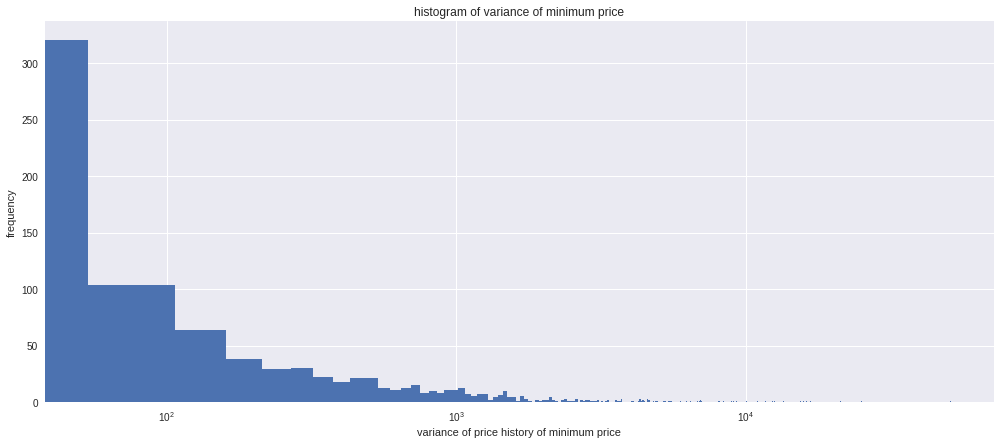

In [10]:
fig = plt.figure(figsize=(17,7))
#plt.ylim([0, 50])
plt.hist(lowests_vars, bins=len(lowests_vars))
#plt.hist(lowests_vars, bins=bins)
plt.xlabel('variance of price history of minimum price')
plt.ylabel('frequency')
plt.title('histogram of variance of minimum price')
plt.xscale('log')
plt.show()

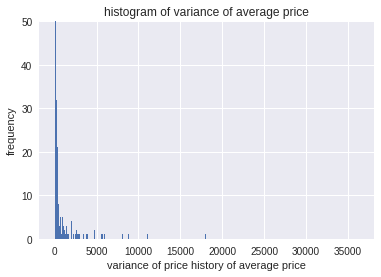

In [11]:
fig = plt.figure()
plt.ylim([0, 50])
plt.hist(average_vars, bins=len(average_vars))
plt.xlabel('variance of price history of average price')
plt.ylabel('frequency')
plt.title('histogram of variance of average price')
plt.show()

### Length analysis

In [12]:
lowlengths[:20]

array([259, 259,  42, 261, 352, 210, 114, 259, 105, 340, 168, 265, 259,
       289, 252, 244, 267, 164, 160, 260])

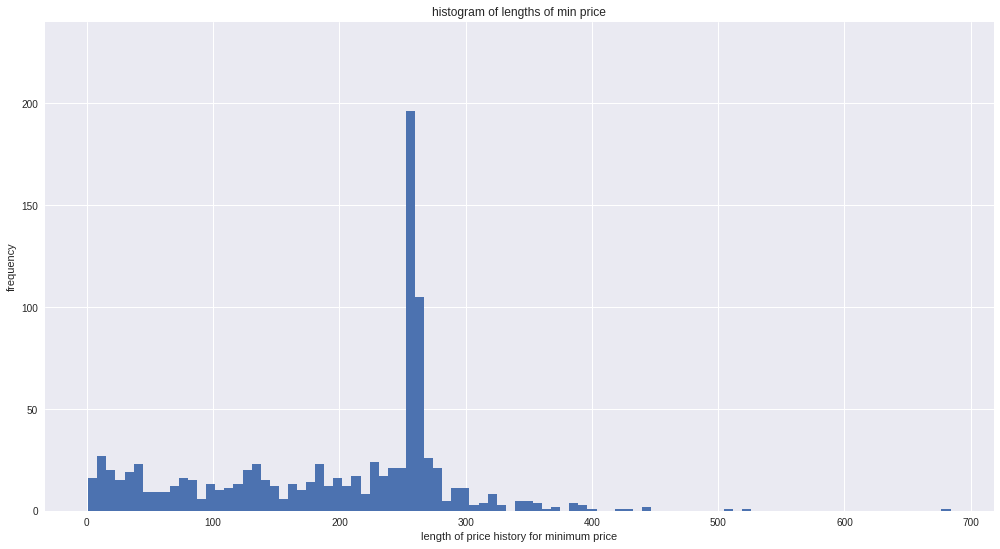

In [13]:
fig = plt.figure(figsize=(17,9))
plt.hist(lowlengths, bins=len(lowlengths)//10)
plt.xlabel('length of price history for minimum price')
plt.ylabel('frequency')
plt.title('histogram of lengths of min price')
plt.ylim([0, 240])
plt.show()

In [14]:
lowlengths.shape

(952,)

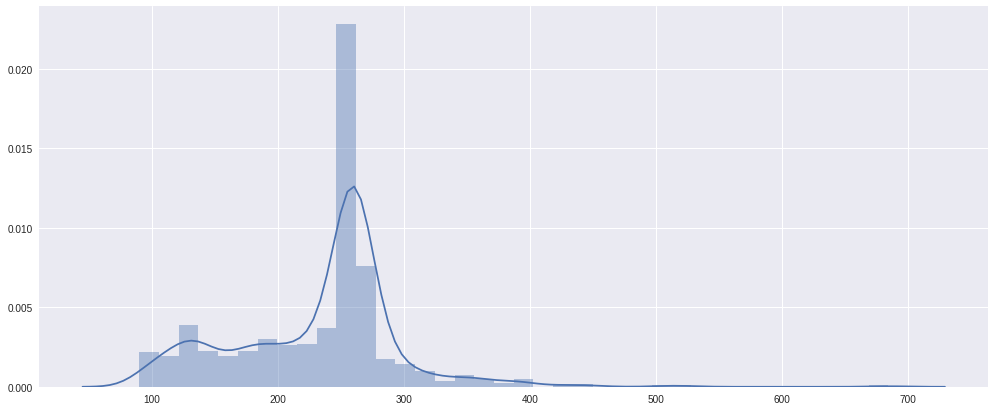

In [19]:
plt.figure(figsize=(17,7))
sns.distplot(lowlengths[lowlengths>89])
#plt.xticks(range(max(lowlengths))[::20])
plt.show()

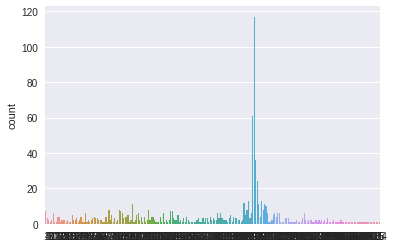

In [15]:
sns.countplot(lowlengths)

In [42]:
print len(lowlengths[lowlengths == 213])

117


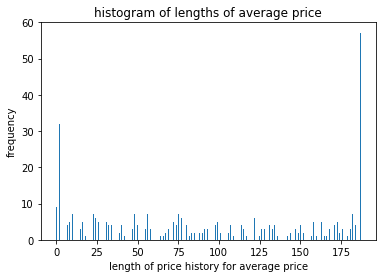

In [34]:
fig = plt.figure()
plt.hist(avglengths, bins=len(avglengths))
plt.xlabel('length of price history for average price')
plt.ylabel('frequency')
plt.title('histogram of lengths of average price')
plt.ylim([0, 60])
plt.show()

In [14]:
max(lowlengths)

684

In [15]:
print len(lowlengths[lowlengths==max(lowlengths)]) / len(lowlengths)

0.0011862396204


In [16]:
max(avglengths)

187

In [17]:
print len(avglengths[avglengths==max(avglengths)]) / len(avglengths)

0.067615658363
